<a href="https://colab.research.google.com/github/ngaeninurul/pisa_performance_scores/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Nurul_Ngaeni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [62]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [63]:
# Muat dataset
data = pd.read_csv('/content/dataset_classification.csv')
data.head()

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value,LOCATION_encoded,INDICATOR_encoded,SUBJECT_encoded,Cluster
0,0,AUS,PISAMATH,BOY,2003,527.000,0,0,0,1
1,1,AUS,PISAMATH,BOY,2006,527.000,0,0,0,1
2,2,AUS,PISAMATH,BOY,2009,519.000,0,0,0,1
3,3,AUS,PISAMATH,BOY,2012,510.115,0,0,0,1
4,4,AUS,PISAMATH,BOY,2015,497.000,0,0,0,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [64]:
# Menentukan fitur dan target (hanya menggunakan kolom numerik yang relevan)
X = data[["LOCATION_encoded", "INDICATOR_encoded", "SUBJECT_encoded", "Value"]]
y = data["Cluster"]

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [65]:
# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [66]:
# Model 2: Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Algoritma yang digunakan:

 **1. Logistic Regression**
- **Penjelasan**:
  Logistic Regression adalah algoritma klasifikasi yang digunakan untuk memprediksi probabilitas suatu kategori berdasarkan variabel input. Model ini cocok untuk dataset yang memiliki hubungan linier antara fitur dan target.
  
- **Mengapa Dipilih?**:
  - Memberikan probabilitas untuk setiap kelas, sehingga memudahkan interpretasi hasil.
  - Efektif untuk dataset dengan jumlah fitur yang tidak terlalu banyak seperti yang digunakan di sini.


 **2. Random Forest**
- **Penjelasan**:
  Random Forest adalah algoritma *ensemble learning* yang menggabungkan prediksi dari beberapa Decision Tree untuk meningkatkan akurasi dan mengurangi risiko *overfitting*. Model ini bekerja dengan membangun beberapa pohon keputusan pada subset data yang berbeda dan menggabungkan hasilnya untuk klasifikasi akhir.
  
- **Mengapa Dipilih?**:
  - Random Forest lebih fleksibel dan biasanya memberikan performa lebih baik dibanding model yang lebih sederhana seperti Logistic Regression, terutama pada dataset yang kompleks.
  - Algoritma ini secara otomatis menangani interaksi antar fitur dan menangani data yang tidak linier.
  - Memiliki kemampuan untuk memberikan fitur yang paling penting dalam memprediksi hasil.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [67]:
# Prediksi pada data latih dan data uji sebelum tuning
log_reg_preds_train = log_reg.predict(X_train)
rf_preds_train = rf_clf.predict(X_train)

log_reg_preds_test = log_reg.predict(X_test)
rf_preds_test = rf_clf.predict(X_test)

# Metrik evaluasi pada data latih (Logistic Regression)
log_reg_acc_train = accuracy_score(y_train, log_reg_preds_train)
log_reg_f1_train = f1_score(y_train, log_reg_preds_train, average='weighted')
log_reg_precision_train = precision_score(y_train, log_reg_preds_train, average='weighted')
log_reg_recall_train = recall_score(y_train, log_reg_preds_train, average='weighted')

# Metrik evaluasi pada data uji (Logistic Regression)
log_reg_acc_test = accuracy_score(y_test, log_reg_preds_test)
log_reg_f1_test = f1_score(y_test, log_reg_preds_test, average='weighted')
log_reg_precision_test = precision_score(y_test, log_reg_preds_test, average='weighted')
log_reg_recall_test = recall_score(y_test, log_reg_preds_test, average='weighted')

# Metrik evaluasi pada data latih (Random Forest)
rf_acc_train = accuracy_score(y_train, rf_preds_train)
rf_f1_train = f1_score(y_train, rf_preds_train, average='weighted')
rf_precision_train = precision_score(y_train, rf_preds_train, average='weighted')
rf_recall_train = recall_score(y_train, rf_preds_train, average='weighted')

# Metrik evaluasi pada data uji (Random Forest)
rf_acc_test = accuracy_score(y_test, rf_preds_test)
rf_f1_test = f1_score(y_test, rf_preds_test, average='weighted')
rf_precision_test = precision_score(y_test, rf_preds_test, average='weighted')
rf_recall_test = recall_score(y_test, rf_preds_test, average='weighted')

# Menampilkan hasil evaluasi sebelum tuning
results_before_tuning = pd.DataFrame({
    'Model': ['Logistic Regression (Train)', 'Random Forest (Train)', 'Logistic Regression (Test)', 'Random Forest (Test)'],
    'Accuracy': [log_reg_acc_train, rf_acc_train, log_reg_acc_test, rf_acc_test],
    'F1-Score': [log_reg_f1_train, rf_f1_train, log_reg_f1_test, rf_f1_test],
    'Precision': [log_reg_precision_train, rf_precision_train, log_reg_precision_test, rf_precision_test],
    'Recall': [log_reg_recall_train, rf_recall_train, log_reg_recall_test, rf_recall_test]
})

print("Hasil Evaluasi Sebelum Tuning:\n", results_before_tuning)


Hasil Evaluasi Sebelum Tuning:
                          Model  Accuracy  F1-Score  Precision    Recall
0  Logistic Regression (Train)  0.999401  0.999400   0.999401  0.999401
1        Random Forest (Train)  1.000000  1.000000   1.000000  1.000000
2   Logistic Regression (Test)  0.997608  0.997602   0.997615  0.997608
3         Random Forest (Test)  1.000000  1.000000   1.000000  1.000000


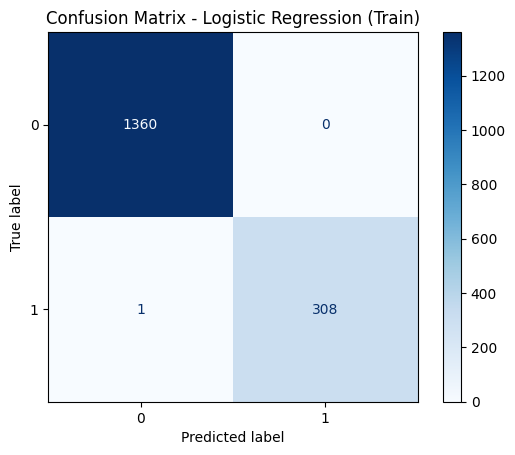

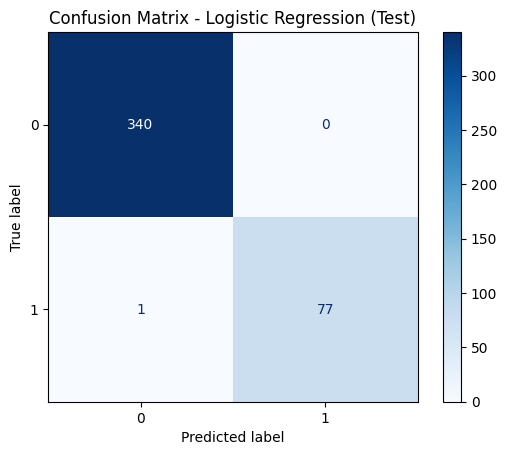

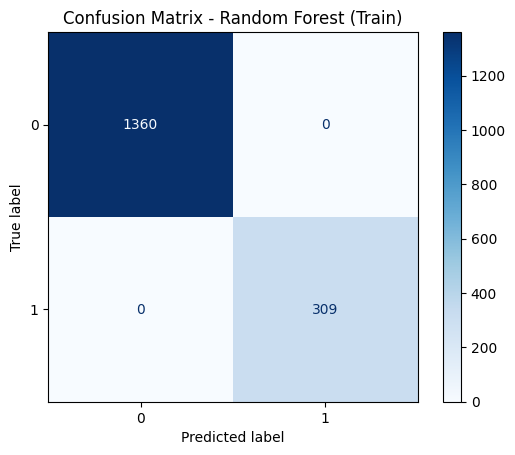

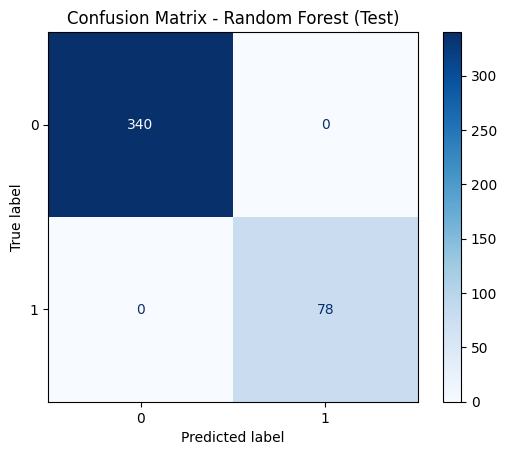

In [74]:
# Confusion matrix untuk Logistic Regression pada data latih dan data uji
log_reg_cm_train = confusion_matrix(y_train, log_reg_preds_train)
log_reg_cm_test = confusion_matrix(y_test, log_reg_preds_test)

# Confusion matrix untuk Random Forest pada data latih dan data uji
rf_cm_train = confusion_matrix(y_train, rf_preds_train)
rf_cm_test = confusion_matrix(y_test, rf_preds_test)

# Logistic Regression - Train
disp_log_reg_train = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm_train)
disp_log_reg_train.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Train)')

# Logistic Regression - Test
disp_log_reg_test = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm_test)
disp_log_reg_test.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Test)')

# Random Forest - Train
disp_rf_train = ConfusionMatrixDisplay(confusion_matrix=rf_cm_train)
disp_rf_train.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest (Train)')

# Random Forest - Test
disp_rf_test = ConfusionMatrixDisplay(confusion_matrix=rf_cm_test)
disp_rf_test.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest (Test)')

plt.show()

Berikut hasil evaluasi model klasifikasi sebelum tuning pada data uji:

1. **Kinerja Logistic Regression**:
   Logistic Regression memberikan performa yang sangat baik, dengan akurasi 99.76%. Namun, ada 1 kasus salah prediksi pada kelas 2 (False Negative), yang menurunkan recall menjadi 98.7% untuk kelas tersebut.

2. **Kinerja Random Forest**:
   Random Forest memberikan kinerja sempurna dengan akurasi 100%, tanpa adanya kesalahan dalam prediksi (baik False Positive maupun False Negative). Ini menunjukkan bahwa algoritma ini lebih unggul dalam menangani pola data yang ada pada dataset ini.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [68]:
# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Hyperparameter Tuning untuk Logistic Regression dengan GridSearchCV
param_grid_log_reg = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

# Model terbaik setelah tuning
best_log_reg = grid_search_log_reg.best_estimator_
print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)

# Hyperparameter Tuning untuk Random Forest dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Model terbaik setelah tuning
best_rf = grid_search.best_estimator_
print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [69]:
# Melatih ulang Logistic Regression dengan parameter terbaik
best_log_reg.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

In [70]:
# Melatih ulang Random Forest dengan parameter terbaik
best_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [71]:
# Prediksi pada data latih dan data uji setelah tuning
log_reg_preds_train_after = best_log_reg.predict(X_train)
rf_preds_train_after = best_rf.predict(X_train)
log_reg_preds_test_after = best_log_reg.predict(X_test)
rf_preds_test_after = best_rf.predict(X_test)

# Metrik evaluasi pada data latih setelah tuning (Logistic Regression)
log_reg_acc_train_after = accuracy_score(y_train, log_reg_preds_train_after)
log_reg_f1_train_after = f1_score(y_train, log_reg_preds_train_after, average='weighted')
log_reg_precision_train_after = precision_score(y_train, log_reg_preds_train_after, average='weighted')
log_reg_recall_train_after = recall_score(y_train, log_reg_preds_train_after, average='weighted')

# Metrik evaluasi pada data uji setelah tuning (Logistic Regression)
log_reg_acc_test_after = accuracy_score(y_test, log_reg_preds_test_after)
log_reg_f1_test_after = f1_score(y_test, log_reg_preds_test_after, average='weighted')
log_reg_precision_test_after = precision_score(y_test, log_reg_preds_test_after, average='weighted')
log_reg_recall_test_after = recall_score(y_test, log_reg_preds_test_after, average='weighted')

# Metrik evaluasi pada data latih setelah tuning (Random Forest)
rf_acc_train_after = accuracy_score(y_train, rf_preds_train_after)
rf_f1_train_after = f1_score(y_train, rf_preds_train_after, average='weighted')
rf_precision_train_after = precision_score(y_train, rf_preds_train_after, average='weighted')
rf_recall_train_after = recall_score(y_train, rf_preds_train_after, average='weighted')

# Metrik evaluasi pada data uji setelah tuning (Random Forest)
rf_acc_test_after = accuracy_score(y_test, rf_preds_test_after)
rf_f1_test_after = f1_score(y_test, rf_preds_test_after, average='weighted')
rf_precision_test_after = precision_score(y_test, rf_preds_test_after, average='weighted')
rf_recall_test_after = recall_score(y_test, rf_preds_test_after, average='weighted')

# Menampilkan hasil evaluasi setelah tuning
results_after_tuning = pd.DataFrame({
    'Model': ['Logistic Regression (Train)', 'Random Forest (Train)', 'Logistic Regression (Test)', 'Random Forest (Test)'],
    'Accuracy': [log_reg_acc_train_after, rf_acc_train_after, log_reg_acc_test_after, rf_acc_test_after],
    'F1-Score': [log_reg_f1_train_after, rf_f1_train_after, log_reg_f1_test_after, rf_f1_test_after],
    'Precision': [log_reg_precision_train_after, rf_precision_train_after, log_reg_precision_test_after, rf_precision_test_after],
    'Recall': [log_reg_recall_train_after, rf_recall_train_after, log_reg_recall_test_after, rf_recall_test_after]
})

print("Hasil Evaluasi Setelah Tuning:\n", results_after_tuning)

Hasil Evaluasi Setelah Tuning:
                          Model  Accuracy  F1-Score  Precision    Recall
0  Logistic Regression (Train)  0.969443  0.968350   0.970547  0.969443
1        Random Forest (Train)  1.000000  1.000000   1.000000  1.000000
2   Logistic Regression (Test)  0.959330  0.957339   0.961267  0.959330
3         Random Forest (Test)  1.000000  1.000000   1.000000  1.000000


In [72]:
# Perbandingan nilai metrik sebelum dan setelah tuning pada data uji
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
    'Random Forest - Before Tuning': [rf_acc, rf_f1, rf_precision, rf_recall],
    'Random Forest - After Tuning': [rf_acc_after, rf_f1_after, rf_precision_after, rf_recall_after],
    'Logistic Regression - Before Tuning': [log_reg_acc, log_reg_f1, log_reg_precision, log_reg_recall],
    'Logistic Regression - After Tuning': [log_reg_acc_after, log_reg_f1_after, log_reg_precision_after, log_reg_recall_after]
})

print(comparison_df.to_markdown())

|    | Metric    |   Random Forest - Before Tuning |   Random Forest - After Tuning |   Logistic Regression - Before Tuning |   Logistic Regression - After Tuning |
|---:|:----------|--------------------------------:|-------------------------------:|--------------------------------------:|-------------------------------------:|
|  0 | Accuracy  |                               1 |                              1 |                              0.997608 |                             0.95933  |
|  1 | F1-Score  |                               1 |                              1 |                              0.997602 |                             0.957339 |
|  2 | Precision |                               1 |                              1 |                              0.997615 |                             0.961267 |
|  3 | Recall    |                               1 |                              1 |                              0.997608 |                             0.95933  |


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut analisis hasil evaluasi model klasifikasi:

### 1. **Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**

- **Random Forest** menunjukkan performasi sempurna dengan akurasi, F1-Score, Precision, dan Recall yang semuanya bernilai 1 (100%) baik sebelum maupun setelah tuning. Model ini sangat konsisten dan tidak mengalami perubahan meskipun dilakukan tuning.

- **Logistic Regression** menunjukkan performa yang stabil, namun ada penurunan setelah tuning. Sebelum tuning, Logistic Regression memiliki nilai akurasi, F1-Score, Precision, dan Recall yang sangat tinggi, yakni sekitar 0.9976 (99.76%), tetapi setelah tuning, hasilnya turun menjadi sekitar 0.959 (95.9%). Meskipun masih baik, ada penurunan kinerja yang cukup signifikan setelah tuning.

### 2. **Identifikasi Kelemahan Model**

- **Random Forest**
  
  **Tidak ada kelemahan yang jelas**, karena model ini menghasilkan performa yang sempurna pada semua metrik. Namun, seperti yang disebutkan sebelumnya, Random Forest dapat memiliki potensi overfitting jika tidak dilakukan validasi silang yang memadai.

- **Logistic Regression**
    
  Penurunan signifikan dalam metrik evaluasi setelah tuning pada model Logistic Regression menunjukkan adanya **kemungkinan overfitting** pada model sebelum tuning. Ketika parameter tuning diterapkan, model menjadi lebih sensitif terhadap data dan kehilangan performa yang sebelumnya sangat baik pada data latih.


### 3. **Rekomendasi Tindakan Lanjutan**

- **Random Forest**
  
  - **Validasi silang (cross-validation)** untuk memastikan bahwa model tidak mengalami overfitting.
  - **Analisis pentingnya fitur** untuk mengevaluasi dan meningkatkan kemampuan generalisasi model.

- **Logistic Regression**
  - Pertimbangkan untuk melakukan tuning lebih lanjut atau menggunakan teknik lain, seperti** Grid Search** atau **Randomized Search**, untuk mencari parameter yang lebih optimal.
  - Mencoba teknik seperti **SMOTE** untuk mengatasi ketidakseimbangan kelas yang mungkin mempengaruhi hasil tuning model.
